In [3921]:
# Import Library
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [3922]:
#Read Dataset, di sini pake yang 2 karena lebih lengkap
df = pd.read_csv('sleepdata_2.csv')

In [3923]:
df.head(3)

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (Â°C),Weather type,Notes
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,5/13/2019 6:00,5/13/2019 6:00,True,92.0,0.0,No weather,NaN
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,5/14/2019 5:49,5/14/2019 5:49,True,0.0,0.0,No weather,NaN
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,5/15/2019 5:49,5/15/2019 5:49,True,74.0,0.0,No weather,NaN


### Label Data

In [3924]:
print(df.columns)

Index(['Start', 'End', 'Sleep Quality', 'Regularity', 'Mood',
       'Heart rate (bpm)', 'Steps', 'Alarm mode', 'Air Pressure (Pa)', 'City',
       'Movements per hour', 'Time in bed (seconds)', 'Time asleep (seconds)',
       'Time before sleep (seconds)', 'Window start', 'Window stop',
       'Did snore', 'Snore time', 'Weather temperature (Â°C)', 'Weather type',
       'Notes'],
      dtype='object')


# Data Understanding
0. Start : Waktu tidur dimulai
1. End : Waktu tidur selesai
2. Sleep Quality : Presentase kualitas tidur
3. Sleep Regularity : Presentase pattern sleep, semakin tinggi semakin baik (weak positive) 1-((CV(start_time)+CV(End_time))/2)*100
4. Mood : Null, bisa diremove
5. Heart rate : Null, bisa diremove
6. steps : Langkah kaki
7. Alarm mode : normal atau tidak ada
8. Air pressure : Null, bisa diremove
9. City : Null, bisa diremove
10. movement/hour : banyaknya gerakan perjam
11. Time in bed : waktu di tempat tidur, redundant bisa diremove
12. Time asleep : Waktu tidur (bisa menggunakan sleep confidence)
13. Time before sleep : waktu sebelum tidur
14. window start : unnecessary feature, redundant dengan start. Bisa diremove
15. Window stop : unnecessary feature, redundant dengan end. Bisa diremove
16. Did snore : ngorok, mostly True. Bisa diremove
17. snore time : durasi ngorok. Remove
18. Weather Temp : Null, bisa diremove
19. Weather type : Null, bisa diremove

In [3925]:
#rename column
df.columns = ['start', 'end', 'quality', 'regularity', 'mood', 'hr', 'steps', 'alarm', 'pa', 'city', 'mph', 'tib', 'ta', 'tbs', 'wst', 'ws', 'ds', 'st', 'wtc', 'wt', 'notes']

In [3926]:
df.head(3)

,start,end,quality,regularity,mood,hr,steps,alarm,pa,city,...,tib,ta,tbs,wst,ws,ds,st,wtc,wt,notes
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,5/13/2019 6:00,5/13/2019 6:00,True,92.0,0.0,No weather,NaN
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,5/14/2019 5:49,5/14/2019 5:49,True,0.0,0.0,No weather,NaN
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,5/15/2019 5:49,5/15/2019 5:49,True,74.0,0.0,No weather,NaN


In [3927]:
df2 = df.drop(['mood', 'hr', 'steps', 'alarm', 'pa', 'city', 'mph', 'tib','wst', 'ws', 'ds', 'st', 'wtc', 'wt', 'notes'], axis=
1)

In [3928]:
df2.head(10)

,start,end,quality,regularity,ta,tbs
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,22993.8,161.9
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,25160.9,192.1
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,28430.8,203.1
3,5/15/2019 23:11,5/16/2019 6:13,77%,92%,23132.5,168.9
4,5/16/2019 23:12,5/17/2019 6:20,78%,94%,22614.6,171.3
5,5/19/2019 1:25,5/19/2019 8:43,72%,80%,20759.8,175.2
6,5/20/2019 22:41,5/21/2019 6:22,73%,58%,24565.2,184.7
7,5/21/2019 22:39,5/22/2019 6:00,78%,77%,22780.4,176.6
8,5/22/2019 22:36,5/23/2019 6:03,84%,98%,25925.9,178.8
9,5/23/2019 23:15,5/24/2019 6:33,88%,95%,23761.4,175.4


In [3929]:
#Remove 0 values

df2 = df2[df2.regularity != "0%"]

In [3930]:
df2 = df2[df2["ta"] != 0]

In [3931]:
#strip % and convert to string
df2['regularity'] = df2['regularity'].str.rstrip('%').astype(int)
df2['quality'] = df2['quality'].str.rstrip('%').astype(int)


In [3932]:
df2.head()

,start,end,quality,regularity,ta,tbs
2,5/14/2019 21:43,5/15/2019 6:10,86,96,28430.8,203.1
3,5/15/2019 23:11,5/16/2019 6:13,77,92,23132.5,168.9
4,5/16/2019 23:12,5/17/2019 6:20,78,94,22614.6,171.3
5,5/19/2019 1:25,5/19/2019 8:43,72,80,20759.8,175.2
6,5/20/2019 22:41,5/21/2019 6:22,73,58,24565.2,184.7


In [3933]:
#strip time data to milli
df2['start'] = df2['start']

In [3934]:
#Kita ubah time series jadi second untuk normalisasi
def time_to_seconds(time_str):
    hours, minutes = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60
    return total_seconds
df2['start'] = df2['start'].str[-5:]
df2['end'] = df2['end'].str[-5:]

df2['start'] = df2['start'].apply(time_to_seconds)
df2['end'] = df2['end'].apply(time_to_seconds)



In [3935]:
df2.head(5)

,start,end,quality,regularity,ta,tbs
2,78180,22200,86,96,28430.8,203.1
3,83460,22380,77,92,23132.5,168.9
4,83520,22800,78,94,22614.6,171.3
5,5100,31380,72,80,20759.8,175.2
6,81660,22920,73,58,24565.2,184.7


In [3936]:
#Disini time series tidur malam kita hitung dari jam 6 malam sampai 6 pagi.
#Jadi kita normalisasi jika user tidur di atas jam 12 malam

df2.loc[df2['start'] < 3600*6, 'start'] = df2.loc[df2['start'] < 3600*6, 'start'] + 3600*24


In [3937]:
# Remove negative values
mask = (df2 < 0).any(axis=1)

df2 = df2[~mask]

In [3938]:
df2.head(3)


,start,end,quality,regularity,ta,tbs
2,78180,22200,86,96,28430.8,203.1
3,83460,22380,77,92,23132.5,168.9
4,83520,22800,78,94,22614.6,171.3


## EDA

In [3939]:
# kualitas tidur paling rendah: 7%
print(df2["quality"].min() / 3600)
print(df2[df2["quality"] == df2["quality"].min()])

0.0019444444444444444
     start    end  quality  regularity      ta   tbs
563  58620  61440        7          45  2798.3  57.1


In [3940]:
# kualitas tidur paling tinggi: 100%
print(df2["quality"].max() / 3600)
print(df2[df2["quality"] == df2["quality"].max()])

0.027777777777777776
     start    end  quality  regularity       ta     tbs
20   78420  24420      100          92  29929.0   216.1
63   84240  27660      100          92  27954.0   199.0
69   81900  30900      100          90  35180.8   236.1
73   84480  28200      100          80  28135.1   201.0
76   84780  29700      100          72  28926.9   208.9
83   81660  28860      100          90  29898.9  2687.5
146  77640  21660      100          90  27774.2  1216.4
153  81540  28500      100          88  32510.5   222.7
155  79980  21660      100          88  27905.9   187.3
158  78180  27360      100          88  30721.6  3202.6
163  76860  22920      100          92  31435.4   216.1
165  82200  29040      100          86  33023.5   221.6
166  83880  30780      100          89  33061.1   221.9
168  76380  20160      100          83  29083.1   201.3
178  85200  28980      100          75  29968.4   201.1
191  88320  34140      100          70  31056.3   214.9
225  85320  32460      100 

quality = 7% - 100%

In [3941]:
# waktu tidur paling awal: 4 sore
print(df2["start"].min() / 3600)
print(df2[df2["start"] == df2["start"].min()])

16.283333333333335
     start    end  quality  regularity      ta   tbs
563  58620  61440        7          45  2798.3  57.1


In [3942]:
# waktu tidur paling akhir: 2 pagi
print(df2["start"].max() / 3600)
print(df2[df2["start"] == df2["start"].max()])

26.216666666666665
     start    end  quality  regularity       ta    tbs
632  94380  28080       66          80  19719.8  402.4


start = 4 sore - 2 pagi

In [3943]:
# waktu bangun paling awal: 1 pagi
print(df2["end"].min() / 3600)
print(df2[df2["end"] == df2["end"].min()])

1.0833333333333333
    start   end  quality  regularity       ta    tbs
49  69900  3900       53          86  17226.6  136.2


In [3944]:
# waktu bangun paling akhir: 11 malam
print(df2["end"].max() / 3600)
print(df2[df2["end"] == df2["end"].max()])

23.483333333333334
     start    end  quality  regularity      ta    tbs
823  77100  84540       25          41  7303.4  149.0


end = 1 pagi - 11 malam

In [3945]:
# waktu tidur paling sedikit: 0.7 jam
print(df2["ta"].min() / 3600)
print(df2[df2["ta"] == df2["ta"].min()])

0.7773055555555556
     start    end  quality  regularity      ta   tbs
563  58620  61440        7          45  2798.3  57.1


In [3946]:
# waktu tidur paling banyak: 12 jam
print(df2["ta"].max() / 3600)
print(df2[df2["ta"] == df2["ta"].max()])

12.713722222222223
     start    end  quality  regularity       ta    tbs
809  77460  37740      100          70  45769.4  934.1


ta = 0.7 jam - 12 jam

In [3947]:
# waktu sebelum tidur paling sedikit: 0.9 menit
print(df2["tbs"].min() / 60)
print(df2[df2["tbs"] == df2["tbs"].min()])

0.9516666666666667
     start    end  quality  regularity      ta   tbs
563  58620  61440        7          45  2798.3  57.1


In [3948]:
# waktu sebelum tidur paling banyak: 94 menit
print(df2["tbs"].max() / 60)
print(df2[df2["tbs"] == df2["tbs"].max()])

94.62833333333333
     start    end  quality  regularity       ta     tbs
508  78660  18060       71          95  20129.9  5677.7


tbs = 0.9 menit - 94 menit

In [3949]:
df2.size

5448

In [3950]:
df2 = df2[df2.ta > 0]


In [3951]:
df2.size

5448

## Feature Correlation

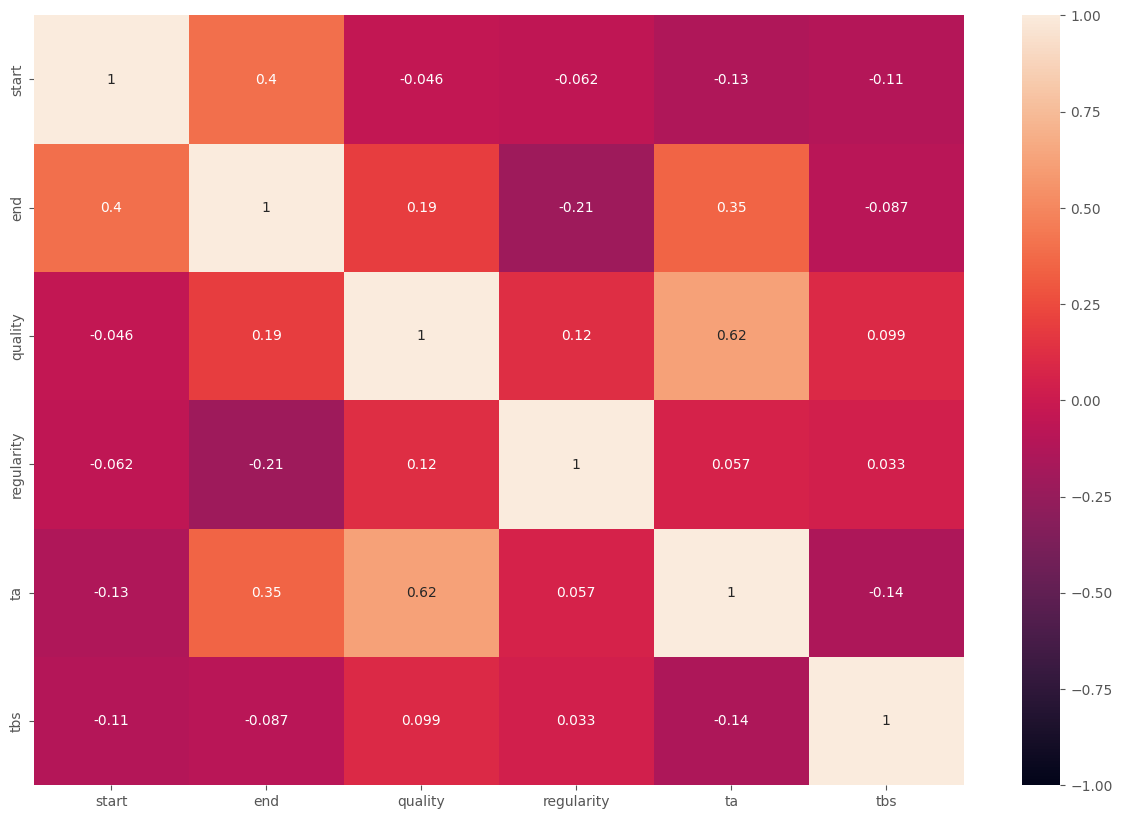

In [3952]:
# Matrix Correlation
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(), vmin = -1, vmax = 1, annot = True);

## Sort Data

In [3953]:
df2 = df2.sort_values("quality")
df2

,start,end,quality,regularity,ta,tbs
563,58620,61440,7,45,2798.3,57.1
823,77100,84540,25,41,7303.4,149.0
337,78060,20640,34,79,27619.6,579.4
196,84480,25200,35,94,20605.9,180.8
322,81720,24660,38,91,21196.2,586.1
...,...,...,...,...,...,...
768,76860,23520,100,84,26357.0,4080.4
557,81120,26280,100,84,29139.9,631.2
391,80460,29700,100,79,34922.2,712.7
166,83880,30780,100,89,33061.1,221.9


## Normalisasi Data

In [3954]:
X = df2.iloc[:, df2.columns != "quality"]
y = df2["quality"]
y.tail(14)

20     100
153    100
315    100
276    100
798    100
763    100
63     100
158    100
83     100
768    100
557    100
391    100
166    100
369    100
Name: quality, dtype: int64

In [3955]:
# MinMaxScale Normalization for Features
from sklearn.preprocessing import MinMaxScaler

MMScaler_features = MinMaxScaler()
df_norm_features = MMScaler_features.fit_transform(X)
df_norm_features = pd.DataFrame(df_norm_features, columns=X.columns)
df_norm_features.head(5)

,start,end,regularity,ta,tbs
0,0.000000,0.713542,0.294872,0.000000,0.000000
1,0.516779,1.000000,0.243590,0.104840,0.016351
2,0.543624,0.207589,0.730769,0.577628,0.092926
3,0.723154,0.264137,0.923077,0.414409,0.022008
4,0.645973,0.257440,0.884615,0.428146,0.094118


In [3956]:
# MinMaxScale Normalization for Target
MMScaler_target = MinMaxScaler()
df_norm_target = MMScaler_target.fit_transform(np.array(y).reshape(-1, 1))
df_norm_target = pd.DataFrame(df_norm_target, columns=["quality"])
# df_norm_target.head(5)
df_norm_target.tail(5)

,quality
903,1.0
904,1.0
905,1.0
906,1.0
907,1.0


In [3957]:
df_norm = pd.concat([df_norm_features, df_norm_target], axis=1)
df_norm

,start,end,regularity,ta,tbs,quality
0,0.000000,0.713542,0.294872,0.000000,0.000000,0.000000
1,0.516779,1.000000,0.243590,0.104840,0.016351,0.193548
2,0.543624,0.207589,0.730769,0.577628,0.092926,0.290323
3,0.723154,0.264137,0.923077,0.414409,0.022008,0.301075
4,0.645973,0.257440,0.884615,0.428146,0.094118,0.333333
...,...,...,...,...,...,...
903,0.510067,0.243304,0.794872,0.548245,0.715813,1.000000
904,0.629195,0.277530,0.794872,0.613007,0.102142,1.000000
905,0.610738,0.319940,0.730769,0.747570,0.116642,1.000000
906,0.706376,0.333333,0.858974,0.704259,0.029321,1.000000


## Data Augmentation

### Data Distribution (before augmentation)

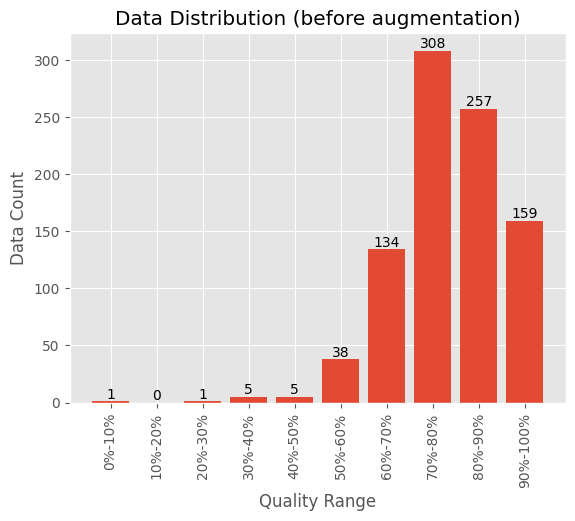

In [3958]:
import matplotlib.pyplot as plt

zero_one = df2.loc[df2["quality"] < 10].count()["quality"]
one_two = df2.loc[(df2["quality"] >= 10) & (df2["quality"] < 20)].count()["quality"]
two_three = df2.loc[(df2["quality"] >= 20) & (df2["quality"] < 30)].count()["quality"]
three_four = df2.loc[(df2["quality"] >= 30) & (df2["quality"] < 40)].count()["quality"]
four_five = df2.loc[(df2["quality"] >= 40) & (df2["quality"] < 50)].count()["quality"]
five_six = df2.loc[(df2["quality"] >= 50) & (df2["quality"] < 60)].count()["quality"]
six_seven = df2.loc[(df2["quality"] >= 60) & (df2["quality"] < 70)].count()["quality"]
seven_eight = df2.loc[(df2["quality"] >= 70) & (df2["quality"] < 80)].count()["quality"]
eight_nine = df2.loc[(df2["quality"] >= 80) & (df2["quality"] < 90)].count()["quality"]
nine_ten = df2.loc[df2["quality"] >= 90].count()["quality"]

qualities = [zero_one, one_two, two_three, three_four, four_five, five_six, six_seven, seven_eight, eight_nine, nine_ten]
labels = ["0%-10%", "10%-20%", "20%-30%", "30%-40%", "40%-50%", "50%-60%", "60%-70%", "70%-80%", "80%-90%", "90%-100%"]

plt.style.use("ggplot")

plt.bar(labels, qualities)

for i, count in enumerate(qualities):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title("Data Distribution (before augmentation)")
plt.xlabel("Quality Range")
plt.ylabel("Data Count")

plt.xticks(rotation=90)

plt.show()

In [3959]:
augmented_data = []

In [3960]:
perturbation = np.random.uniform(low=-0.05, high=0.05)
perturbation

0.04130175358681941

In [3961]:
target_count = 400
quality_ranges = [(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1), (1, 1.1)]

# Iterate over each quality range
for quality_range in quality_ranges:
    range_start, range_end = quality_range
    range_data = df_norm[(df_norm["quality"] >= range_start) & (df_norm["quality"] < range_end)]
    existing_count = len(range_data)
    
    # Calculate the number of additional samples needed
    additional_samples = target_count - existing_count
    count = additional_samples if additional_samples >= 0 else 0
    
    # Generate augmented samples by perturbing existing data
    # If additional samples are needed, perturb existing data
    
    # jika jumlah baris kurang dari sample baru yang dibutuhkan,
    # > ambil semua baris lalu perturb, lakukan berulang kali sampai jumlah iterasi sama dengan additional_samples
    # jika jumlah baris lebih dari sama dengan sample baru yang dibutuhkan,
    # > ambil baris random sesuai dengan additional_samples lalu perturb

    if existing_count != 0:
        if existing_count < additional_samples:
            copied_rows = pd.concat([range_data] * int(additional_samples / existing_count), ignore_index=True)
            if additional_samples % existing_count != 0:
                random_rows = range_data.sample((additional_samples % existing_count), replace=True)
                selected_rows = pd.concat([copied_rows, random_rows], ignore_index=True)
            else:
              selected_rows = copied_rows
        else:
            selected_rows = range_data.sample(n=additional_samples, random_state=42)

        for _, row in selected_rows.iterrows():
            augmented_row = row.copy()
            for col in augmented_row.index:
                perturbation = np.random.uniform(low=-0.01, high=0.01)
                augmented_row[col] += perturbation
            augmented_data.append(augmented_row)

In [3962]:
augmented_data = pd.DataFrame(augmented_data)
augmented_data

,start,end,regularity,ta,tbs,quality
0,0.003628,0.722322,0.296042,-0.000517,0.003993,0.009643
1,-0.005526,0.704468,0.302892,-0.005859,-0.002137,-0.008850
2,-0.009487,0.708619,0.295053,-0.005494,-0.001831,0.003551
3,0.008798,0.715576,0.287973,0.002781,-0.009991,0.000296
4,-0.009194,0.705079,0.302790,0.005493,0.001917,-0.007546
...,...,...,...,...,...,...
358,0.575802,0.241734,0.893422,0.558179,0.383715,0.992189
359,0.516440,0.231311,0.818187,0.600457,0.492554,1.004910
360,0.744184,0.314221,0.684506,0.627164,0.033233,0.993728
361,0.588856,0.253176,0.882211,0.559807,0.384896,1.008437


In [3963]:
# Remove negative values
mask = (augmented_data < 0).any(axis=1)
augmented_data = augmented_data[~mask]

# Remove values above 1
mask = (augmented_data > 1).any(axis=1)
augmented_data = augmented_data[~mask]

augmented_data

,start,end,regularity,ta,tbs,quality
36,0.005851,0.722295,0.291503,0.004849,0.004210,0.008314
60,0.001935,0.713803,0.297587,0.008334,0.005276,0.007324
63,0.001597,0.711649,0.292674,0.003959,0.005312,0.005526
75,0.002159,0.716080,0.294054,0.003869,0.002160,0.004103
79,0.004162,0.712974,0.291317,0.005729,0.004508,0.000442
...,...,...,...,...,...,...
356,0.750803,0.345943,0.709777,0.642495,0.158905,0.999185
357,0.671733,0.321332,0.763911,0.672542,0.291420,0.997877
358,0.575802,0.241734,0.893422,0.558179,0.383715,0.992189
360,0.744184,0.314221,0.684506,0.627164,0.033233,0.993728


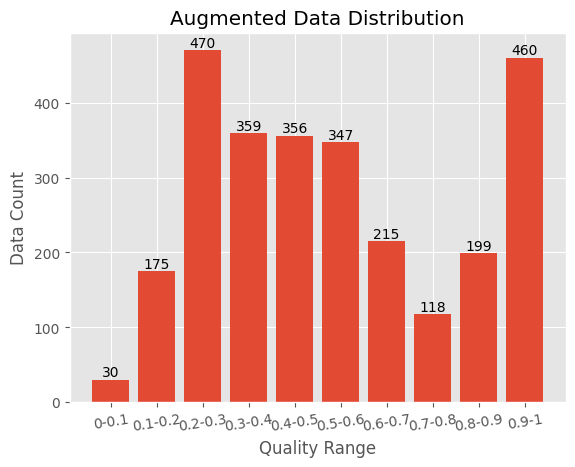

In [3964]:
import matplotlib.pyplot as plt

zero_one = augmented_data.loc[augmented_data["quality"] < 0.1].count()["quality"]
one_two = augmented_data.loc[(augmented_data["quality"] >= 0.1) & (augmented_data["quality"] < 0.2)].count()["quality"]
two_three = augmented_data.loc[(augmented_data["quality"] >= 0.2) & (augmented_data["quality"] < 0.3)].count()["quality"]
three_four = augmented_data.loc[(augmented_data["quality"] >= 0.3) & (augmented_data["quality"] < 0.4)].count()["quality"]
four_five = augmented_data.loc[(augmented_data["quality"] >= 0.4) & (augmented_data["quality"] < 0.5)].count()["quality"]
five_six = augmented_data.loc[(augmented_data["quality"] >= 0.5) & (augmented_data["quality"] < 0.6)].count()["quality"]
six_seven = augmented_data.loc[(augmented_data["quality"] >= 0.6) & (augmented_data["quality"] < 0.7)].count()["quality"]
seven_eight = augmented_data.loc[(augmented_data["quality"] >= 0.7) & (augmented_data["quality"] < 0.8)].count()["quality"]
eight_nine = augmented_data.loc[(augmented_data["quality"] >= 0.8) & (augmented_data["quality"] < 0.9)].count()["quality"]
nine_ten = augmented_data.loc[augmented_data["quality"] >= 0.9].count()["quality"]

qualities = [zero_one, one_two, two_three, three_four, four_five, five_six, six_seven, seven_eight, eight_nine, nine_ten]
labels = ["0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-0.5", "0.5-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", "0.9-1"]

plt.style.use("ggplot")

plt.bar(labels, qualities)

for i, count in enumerate(qualities):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title("Augmented Data Distribution")
plt.xlabel("Quality Range")
plt.ylabel("Data Count")

plt.xticks(rotation=9)

plt.show()

In [3965]:
augmented_df = pd.concat([df_norm, augmented_data], ignore_index=True)
augmented_df = augmented_df.sort_values("quality")
augmented_df

,start,end,regularity,ta,tbs,quality
0,0.000000,0.713542,0.294872,0.000000,0.000000,0.000000
914,0.008468,0.705567,0.302151,0.007421,0.005002,0.000341
912,0.004162,0.712974,0.291317,0.005729,0.004508,0.000442
927,0.005331,0.708405,0.288967,0.003082,0.004637,0.000619
936,0.001195,0.719284,0.291536,0.008366,0.004133,0.001204
...,...,...,...,...,...,...
904,0.629195,0.277530,0.794872,0.613007,0.102142,1.000000
905,0.610738,0.319940,0.730769,0.747570,0.116642,1.000000
887,0.526846,0.419643,0.615385,1.000000,0.156033,1.000000
885,0.731544,0.319940,0.641026,0.608051,0.027008,1.000000


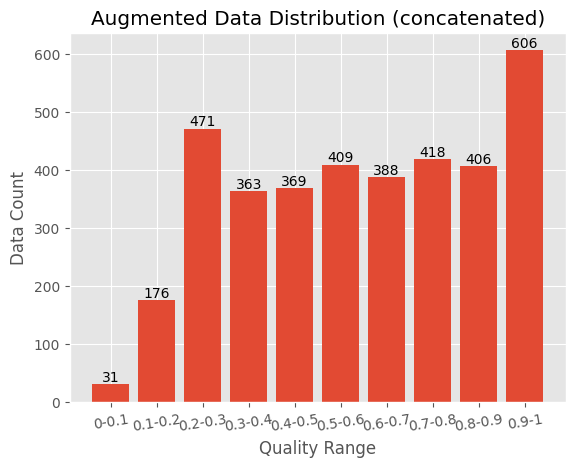

In [3966]:
import matplotlib.pyplot as plt

zero_one = augmented_df.loc[augmented_df["quality"] < 0.1].count()["quality"]
one_two = augmented_df.loc[(augmented_df["quality"] >= 0.1) & (augmented_df["quality"] < 0.2)].count()["quality"]
two_three = augmented_df.loc[(augmented_df["quality"] >= 0.2) & (augmented_df["quality"] < 0.3)].count()["quality"]
three_four = augmented_df.loc[(augmented_df["quality"] >= 0.3) & (augmented_df["quality"] < 0.4)].count()["quality"]
four_five = augmented_df.loc[(augmented_df["quality"] >= 0.4) & (augmented_df["quality"] < 0.5)].count()["quality"]
five_six = augmented_df.loc[(augmented_df["quality"] >= 0.5) & (augmented_df["quality"] < 0.6)].count()["quality"]
six_seven = augmented_df.loc[(augmented_df["quality"] >= 0.6) & (augmented_df["quality"] < 0.7)].count()["quality"]
seven_eight = augmented_df.loc[(augmented_df["quality"] >= 0.7) & (augmented_df["quality"] < 0.8)].count()["quality"]
eight_nine = augmented_df.loc[(augmented_df["quality"] >= 0.8) & (augmented_df["quality"] < 0.9)].count()["quality"]
nine_ten = augmented_df.loc[augmented_df["quality"] >= 0.9].count()["quality"]

qualities = [zero_one, one_two, two_three, three_four, four_five, five_six, six_seven, seven_eight, eight_nine, nine_ten]
labels = ["0-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-0.5", "0.5-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", "0.9-1"]

plt.style.use("ggplot")

plt.bar(labels, qualities)

for i, count in enumerate(qualities):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title("Augmented Data Distribution (concatenated)")
plt.xlabel("Quality Range")
plt.ylabel("Data Count")

plt.xticks(rotation=9)

plt.show()

### Data Distribution (after augmentation)

In [3967]:
augmented_real_data = augmented_df.copy()

In [3968]:
augmented_real_data[X.columns] = MMScaler_features.inverse_transform(augmented_real_data[X.columns])

augmented_real_data["quality"] = MMScaler_target.inverse_transform(augmented_real_data[["quality"]])

In [3969]:
augmented_real_data

,start,end,regularity,ta,tbs,quality
0,58620.000000,61440.000000,45.000000,2798.300000,57.100000,7.000000
914,58922.823092,60796.922174,45.567740,3117.209253,85.211571,7.031721
912,58768.817175,61394.218887,44.722698,3044.498786,82.435064,7.041143
927,58810.650349,61025.758011,44.539440,2930.733257,83.164102,7.057580
936,58662.720033,61903.091199,44.739839,3157.807497,80.327280,7.112013
...,...,...,...,...,...,...
904,81120.000000,26280.000000,84.000000,29139.900000,631.200000,100.000000
905,80460.000000,29700.000000,79.000000,34922.200000,712.700000,100.000000
887,77460.000000,37740.000000,70.000000,45769.400000,934.100000,100.000000
885,84780.000000,29700.000000,72.000000,28926.900000,208.900000,100.000000


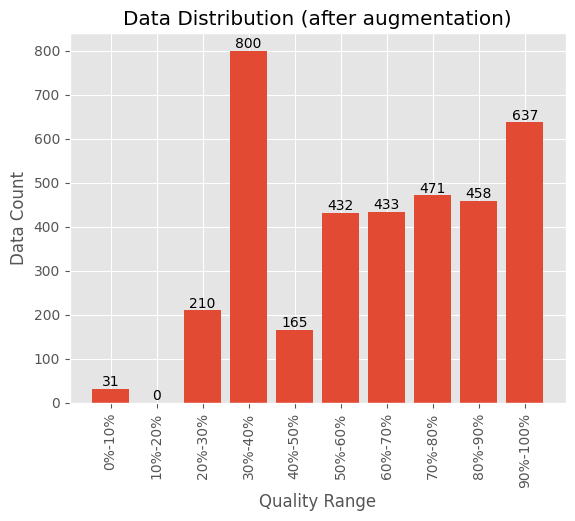

In [3970]:
import matplotlib.pyplot as plt

zero_one = augmented_real_data.loc[augmented_real_data["quality"] < 10].count()["quality"]
one_two = augmented_real_data.loc[(augmented_real_data["quality"] >= 10) & (augmented_real_data["quality"] < 20)].count()["quality"]
two_three = augmented_real_data.loc[(augmented_real_data["quality"] >= 20) & (augmented_real_data["quality"] < 30)].count()["quality"]
three_four = augmented_real_data.loc[(augmented_real_data["quality"] >= 30) & (augmented_real_data["quality"] < 40)].count()["quality"]
four_five = augmented_real_data.loc[(augmented_real_data["quality"] >= 40) & (augmented_real_data["quality"] < 50)].count()["quality"]
five_six = augmented_real_data.loc[(augmented_real_data["quality"] >= 50) & (augmented_real_data["quality"] < 60)].count()["quality"]
six_seven = augmented_real_data.loc[(augmented_real_data["quality"] >= 60) & (augmented_real_data["quality"] < 70)].count()["quality"]
seven_eight = augmented_real_data.loc[(augmented_real_data["quality"] >= 70) & (augmented_real_data["quality"] < 80)].count()["quality"]
eight_nine = augmented_real_data.loc[(augmented_real_data["quality"] >= 80) & (augmented_real_data["quality"] < 90)].count()["quality"]
nine_ten = augmented_real_data.loc[augmented_real_data["quality"] >= 90].count()["quality"]

qualities = [zero_one, one_two, two_three, three_four, four_five, five_six, six_seven, seven_eight, eight_nine, nine_ten]
labels = ["0%-10%", "10%-20%", "20%-30%", "30%-40%", "40%-50%", "50%-60%", "60%-70%", "70%-80%", "80%-90%", "90%-100%"]

plt.style.use("ggplot")

plt.bar(labels, qualities)

for i, count in enumerate(qualities):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title("Data Distribution (after augmentation)")
plt.xlabel("Quality Range")
plt.ylabel("Data Count")

plt.xticks(rotation=90)

plt.show()

## Things to take in consideration
1. Start time normalisasinya masih min max, mungkin lebih baik di setting minnya jam 6 malem dan maxnya 6 pagi jadi variancenya gaterlalu besar
2. end time juga mungkin sebaiknya gitu meskipun blm tau waktu yang bagusnya gimana
3. Quality mungkin dijadiin categorical biar lebih 'gampang' groupingnya

In [3971]:
augmented_df.to_csv('sleepdata_extracted_augmented.csv', index=False)

---

In [3996]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3997]:
df = pd.read_csv("/content/sleepdata_extracted_augmented.csv")
df

,start,end,regularity,ta,tbs,quality
0,0.000000,0.713542,0.294872,0.000000,0.000000,0.000000
1,0.008468,0.705567,0.302151,0.007421,0.005002,0.000341
2,0.004162,0.712974,0.291317,0.005729,0.004508,0.000442
3,0.005331,0.708405,0.288967,0.003082,0.004637,0.000619
4,0.001195,0.719284,0.291536,0.008366,0.004133,0.001204
...,...,...,...,...,...,...
3632,0.629195,0.277530,0.794872,0.613007,0.102142,1.000000
3633,0.610738,0.319940,0.730769,0.747570,0.116642,1.000000
3634,0.526846,0.419643,0.615385,1.000000,0.156033,1.000000
3635,0.731544,0.319940,0.641026,0.608051,0.027008,1.000000


### Separate features and target

In [3998]:
X = df.iloc[:, df.columns != "quality"]
y = df["quality"]

In [3999]:
df.shape[0]

3637

In [4000]:
X.head()

,start,end,regularity,ta,tbs
0,0.000000,0.713542,0.294872,0.000000,0.000000
1,0.008468,0.705567,0.302151,0.007421,0.005002
2,0.004162,0.712974,0.291317,0.005729,0.004508
3,0.005331,0.708405,0.288967,0.003082,0.004637
4,0.001195,0.719284,0.291536,0.008366,0.004133


In [4001]:
y.head()

0    0.000000
1    0.000341
2    0.000442
3    0.000619
4    0.001204
Name: quality, dtype: float64

### Train test split

In [4002]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4003]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 2909
Test set size: 728


### Training

In [4004]:
input_shape = (X.shape[1],)
input_shape

(5,)

In [4005]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [4006]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["mae", "mse"])

In [4007]:
validation_data = (X_test, y_test)

history = model.fit(X_train, y_train, epochs=500, validation_data=validation_data)

Epoch 1/500
91/91 [==============================] - 2s 8ms/step - loss: 0.6718 - mae: 0.2226 - mse: 0.0662 - val_loss: 0.6585 - val_mae: 0.2012 - val_mse: 0.0532
Epoch 2/500
91/91 [==============================] - 0s 5ms/step - loss: 0.6394 - mae: 0.1951 - mse: 0.0506 - val_loss: 0.6452 - val_mae: 0.1850 - val_mse: 0.0470
Epoch 3/500
91/91 [==============================] - 0s 4ms/step - loss: 0.6302 - mae: 0.1833 - mse: 0.0465 - val_loss: 0.6398 - val_mae: 0.1753 - val_mse: 0.0448
Epoch 4/500
91/91 [==============================] - 0s 5ms/step - loss: 0.6255 - mae: 0.1761 - mse: 0.0446 - val_loss: 0.6355 - val_mae: 0.1709 - val_mse: 0.0428
Epoch 5/500
91/91 [==============================] - 0s 4ms/step - loss: 0.6229 - mae: 0.1739 - mse: 0.0434 - val_loss: 0.6341 - val_mae: 0.1702 - val_mse: 0.0423
Epoch 6/500
91/91 [==============================] - 0s 4ms/step - loss: 0.6205 - mae: 0.1717 - mse: 0.0424 - val_loss: 0.6316 - val_mae: 0.1696 - val_mse: 0.0411
Epoch 7/500
91/91 [===

### Evaluation

In [4008]:
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

In [4009]:
print("Training MAE:", mae[-1])
print("Testing MAE:", val_mae[-1])

print("\nTraining MSE:", mse[-1])
print("Testing MSE:", val_mse[-1])

print("\nTraining loss:", loss[-1])
print("Testing loss:", val_loss[-1])

Training MAE: 0.0698891431093216
Testing MAE: 0.07082074135541916

Training MSE: 0.009242181666195393
Testing MSE: 0.010053624399006367

Training loss: 0.5404053330421448
Testing loss: 0.5590038895606995


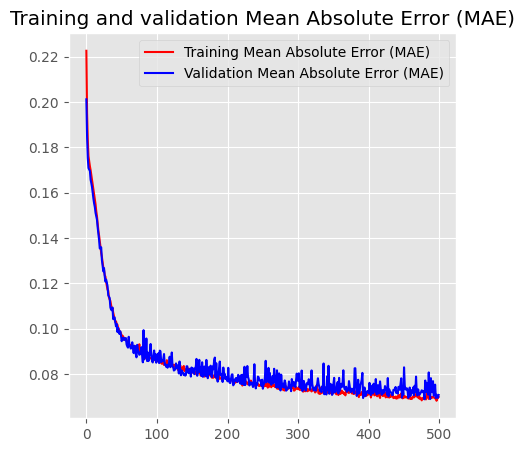

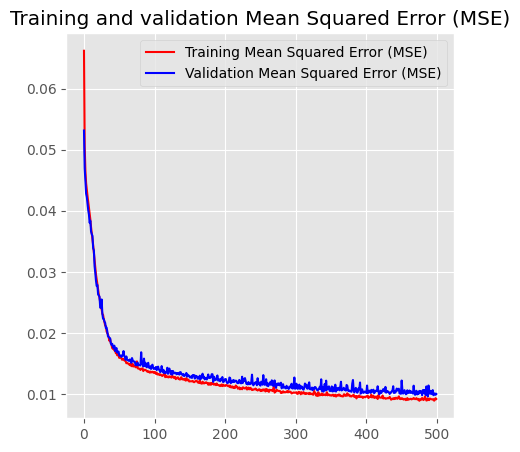

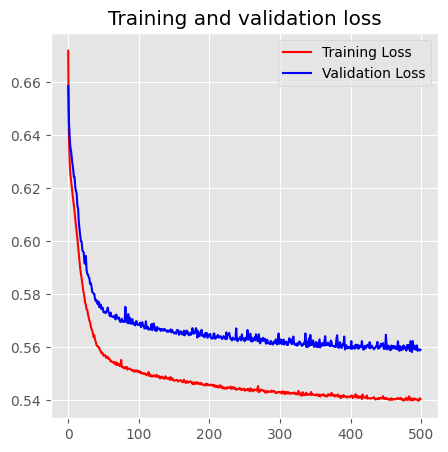

In [4010]:
# MAE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mae, 'r', label='Training Mean Absolute Error (MAE)')
plt.plot(epochs, val_mae, 'b', label='Validation Mean Absolute Error (MAE)')
plt.title('Training and validation Mean Absolute Error (MAE)')
plt.legend()

# MSE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mse, 'r', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse, 'b', label='Validation Mean Squared Error (MSE)')
plt.title('Training and validation Mean Squared Error (MSE)')
plt.legend()

# Loss
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test

### Using Data After Augmentation

In [4011]:
augmented_real_data

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,start,end,regularity,ta,tbs,quality
0,58620.000000,61440.000000,45.000000,2798.300000,57.100000,7.000000
914,58922.823092,60796.922174,45.567740,3117.209253,85.211571,7.031721
912,58768.817175,61394.218887,44.722698,3044.498786,82.435064,7.041143
927,58810.650349,61025.758011,44.539440,2930.733257,83.164102,7.057580
936,58662.720033,61903.091199,44.739839,3157.807497,80.327280,7.112013
...,...,...,...,...,...,...
904,81120.000000,26280.000000,84.000000,29139.900000,631.200000,100.000000
905,80460.000000,29700.000000,79.000000,34922.200000,712.700000,100.000000
887,77460.000000,37740.000000,70.000000,45769.400000,934.100000,100.000000
885,84780.000000,29700.000000,72.000000,28926.900000,208.900000,100.000000


In [4012]:
new_data = pd.DataFrame(augmented_real_data.iloc[0:30, augmented_real_data.columns != augmented_real_data.columns[5]].values, columns=X.columns)

normalized_data = pd.DataFrame(MMScaler_features.transform(new_data), columns=X.columns)

predictions = model.predict(normalized_data)

1/1 [==============================] - 0s 68ms/step


In [4013]:
denormalized_predictions = MMScaler_target.inverse_transform(predictions)

for i in range(len(denormalized_predictions)):
  prediction = denormalized_predictions[i]
  actual = augmented_real_data.iloc[0:30, augmented_real_data.columns == augmented_real_data.columns[5]].values[i]
  difference = abs(prediction - actual)

  print("Prediction: {}\nActual: {}\nDifference: {}\n".format(prediction, actual, difference))

Prediction: [7.325899]
Actual: [7.]
Difference: [0.32589912]

Prediction: [7.346164]
Actual: [7.03172092]
Difference: [0.31444331]

Prediction: [7.368307]
Actual: [7.04114327]
Difference: [0.32716384]

Prediction: [7.351859]
Actual: [7.05757974]
Difference: [0.29427936]

Prediction: [7.388231]
Actual: [7.11201342]
Difference: [0.27621738]

Prediction: [7.329819]
Actual: [7.15008698]
Difference: [0.17973222]

Prediction: [7.313305]
Actual: [7.19114455]
Difference: [0.12216035]

Prediction: [7.39231]
Actual: [7.22493507]
Difference: [0.16737507]

Prediction: [7.3614044]
Actual: [7.28681008]
Difference: [0.07459434]

Prediction: [7.343952]
Actual: [7.28900007]
Difference: [0.05495211]

Prediction: [7.387327]
Actual: [7.33278111]
Difference: [0.05454609]

Prediction: [7.3532276]
Actual: [7.36199946]
Difference: [0.00877185]

Prediction: [7.358352]
Actual: [7.38162486]
Difference: [0.02327268]

Prediction: [7.375748]
Actual: [7.38936633]
Difference: [0.01361817]

Prediction: [7.3435097]
Act

In [4014]:
denormalized_all_predictions = MMScaler_target.inverse_transform(predictions)

sum_of_errors = 0
for i in range(len(denormalized_all_predictions)):
  prediction = denormalized_all_predictions[i]
  actual = augmented_real_data.iloc[:, augmented_real_data.columns == augmented_real_data.columns[5]].values[i]
  difference = abs(denormalized_all_predictions[i] - augmented_real_data.iloc[:, augmented_real_data.columns == augmented_real_data.columns[5]].values[i])

  sum_of_errors += difference

sum_of_errors / len(denormalized_all_predictions)

array([0.20286147])

Rata-rata error per prediksi = 0.2

### Using Data Before Augmentation

In [4015]:
df2

,start,end,quality,regularity,ta,tbs
563,58620,61440,7,45,2798.3,57.1
823,77100,84540,25,41,7303.4,149.0
337,78060,20640,34,79,27619.6,579.4
196,84480,25200,35,94,20605.9,180.8
322,81720,24660,38,91,21196.2,586.1
...,...,...,...,...,...,...
768,76860,23520,100,84,26357.0,4080.4
557,81120,26280,100,84,29139.9,631.2
391,80460,29700,100,79,34922.2,712.7
166,83880,30780,100,89,33061.1,221.9


In [4016]:
new_data = pd.DataFrame(df2.iloc[0:30, df2.columns != df2.columns[2]].values, columns=X.columns)

normalized_data = pd.DataFrame(MMScaler_features.transform(new_data), columns=X.columns)

predictions = model.predict(normalized_data)

1/1 [==============================] - 0s 24ms/step


In [4017]:
denormalized_predictions = MMScaler_target.inverse_transform(predictions)

for i in range(len(denormalized_predictions)):
  prediction = denormalized_predictions[i]
  actual = df2.iloc[0:30, df2.columns == df2.columns[2]].values[i]
  difference = abs(prediction - actual)

  print("Prediction: {}\nActual: {}\nDifference: {}\n".format(prediction, actual, difference))

Prediction: [7.325899]
Actual: [7]
Difference: [0.32589912]

Prediction: [25.310488]
Actual: [25]
Difference: [0.31048775]

Prediction: [32.19827]
Actual: [34]
Difference: [1.80173111]

Prediction: [36.49042]
Actual: [35]
Difference: [1.4904213]

Prediction: [39.64801]
Actual: [38]
Difference: [1.64801025]

Prediction: [40.51436]
Actual: [38]
Difference: [2.51435852]

Prediction: [37.62906]
Actual: [39]
Difference: [1.37094116]

Prediction: [53.00919]
Actual: [46]
Difference: [7.00918961]

Prediction: [54.94406]
Actual: [46]
Difference: [8.94406128]

Prediction: [63.542244]
Actual: [48]
Difference: [15.54224396]

Prediction: [68.25513]
Actual: [49]
Difference: [19.25512695]

Prediction: [58.639263]
Actual: [49]
Difference: [9.63926315]

Prediction: [63.368824]
Actual: [50]
Difference: [13.36882401]

Prediction: [54.069084]
Actual: [51]
Difference: [3.06908417]

Prediction: [54.348812]
Actual: [51]
Difference: [3.3488121]

Prediction: [54.04103]
Actual: [52]
Difference: [2.04103088]

Pr

In [4018]:
denormalized_all_predictions = MMScaler_target.inverse_transform(predictions)

sum_of_errors = 0
for i in range(len(denormalized_all_predictions)):
  prediction = denormalized_all_predictions[i]
  actual = df2.iloc[:, df2.columns == df2.columns[2]].values[i]
  difference = abs(denormalized_all_predictions[i] - df2.iloc[:, df2.columns == df2.columns[2]].values[i])

  sum_of_errors += difference

sum_of_errors / len(denormalized_all_predictions)

array([7.75392303])

Rata-rata error per prediksi = 6.48 (sebelum augmentasi)

Rata-rata error per prediksi = 7.75 (setelah augmentasi)

### Saving Model

In [4019]:
# model.save("model.h5")